In [1]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("newmergedfull_df.csv")
# Drop the null columns where all values are null
#df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df.replace(np.nan, 0)
df

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV,Playoffs
0,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.600,0.250,26,39,12,0
1,1,21200027,1610612764,12,30,25,19,0,0,0,0,86,0.436,0.706,0.300,20,46,15,0
2,2,21200054,1610612764,16,26,16,30,6,0,0,0,94,0.411,0.857,0.345,25,44,19,0
3,1,21200068,1610612764,28,19,25,19,0,0,0,0,91,0.436,0.864,0.222,23,36,20,0
4,2,21200082,1610612764,22,27,23,13,0,0,0,0,85,0.443,0.714,0.417,26,40,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17221,11,21801175,1610612757,28,34,24,30,0,0,0,0,116,0.511,0.625,0.323,28,54,13,1
17222,11,21801190,1610612757,29,21,37,23,0,0,0,0,110,0.488,0.800,0.345,24,40,14,1
17223,12,21801206,1610612757,29,31,26,29,0,0,0,0,115,0.461,0.828,0.321,22,58,16,1
17224,11,21801219,1610612757,26,27,20,31,0,0,0,0,104,0.411,0.864,0.297,18,45,12,1


In [5]:
# Create a Train Test Split

#Use `Playoffs` for the y values

y=df["Playoffs"]
X=df.drop(columns=["Playoffs"])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
X_train.shape, X_test.shape

((12919, 18), (4307, 18))

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [10]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
importance = classifier.coef_[0]
importance

array([-0.30532255,  1.1351078 , -2.63050551,  0.55333132,  0.20718765,
        0.3388778 , -0.05746367,  0.16315221, -0.61746957,  0.31463164,
       -0.15120744,  0.24446175,  2.28744912,  1.14347555,  0.16178866,
        0.21372261,  1.52815286, -0.96609434])

In [12]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.30532
Feature: 1, Score: 1.13511
Feature: 2, Score: -2.63051
Feature: 3, Score: 0.55333
Feature: 4, Score: 0.20719
Feature: 5, Score: 0.33888
Feature: 6, Score: -0.05746
Feature: 7, Score: 0.16315
Feature: 8, Score: -0.61747
Feature: 9, Score: 0.31463
Feature: 10, Score: -0.15121
Feature: 11, Score: 0.24446
Feature: 12, Score: 2.28745
Feature: 13, Score: 1.14348
Feature: 14, Score: 0.16179
Feature: 15, Score: 0.21372
Feature: 16, Score: 1.52815
Feature: 17, Score: -0.96609


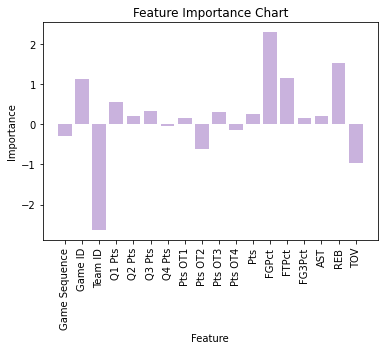

In [13]:
pyplot.bar([x for x in range(len(importance))], importance, color = 'tab:purple', alpha = 0.5, align = 'center')
tick_locations = [x for x in range(len(importance))]
pyplot.xticks(tick_locations, ["Game Sequence", "Game ID", "Team ID", "Q1 Pts", "Q2 Pts", "Q3 Pts", 
                            "Q4 Pts", "Pts OT1", "Pts OT2", "Pts OT3", "Pts OT4", "Pts", "FGPct", "FTPct","FG3Pct", "AST", "REB", "TOV"],
                              rotation = 'vertical')
pyplot.title("Feature Importance Chart")
pyplot.xlabel("Feature")
pyplot.ylabel("Importance")
pyplot.show()

In [14]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.61188946512888
Testing Data Score: 0.6234037613187834
